Just storing some extra code in here for now - come back later for updates! 

---
### Missing data

There's a significant amount of missing at random values that we should consider dropping or replacing with imputed values. Instead of being filled with nulls, these missing values are automatically filled with a designated fill value. The fill value is unique for each variable and can be found in the variable descriptions in the OPeNDAP servers. 

METBK variables: sea_surface_temperature, met_windavg_mag_corr_east, met_windavg_mag_corr_north


| METBK variable             | Fill value |
|----------------------------|------------|
| sea_surface_temperature    | -9999999.0 |
| met_windavg_mag_corr_east  | -9999999.0 |
| met_windavg_mag_corr_north | -9999999.0 |

platform variables: seawater_pressure, density, practical_salinity, seawater_temperature, dissolved_oxygen]

| 200m platform variable | Fill value |
|------------------------|------------|
| seawater_pressure      | -9999999.0 |
| density                | -9999999.0 |
| practical_salinity     | -9999999.0 |
| seawater_temperature   | -9999999.0 |
| dissolved_oxygen       | -9999999.0 |

How nice that they all have the same fill value! Let's check how many observations were filled with these values in the data we pulled.

First, I know there are some null values in the METBK dataset, let's see how many there are. 

In [8]:
METBK_data.isna().sum()/len(METBK_data)

time                          0.000000
sea_surface_temperature       0.000000
met_windavg_mag_corr_east     0.037064
met_windavg_mag_corr_north    0.037064
dtype: float64

Hmm, less than 5% of the data. It might be okay to drop these. We can use a handy module called missingno to see where the nulls are located. 

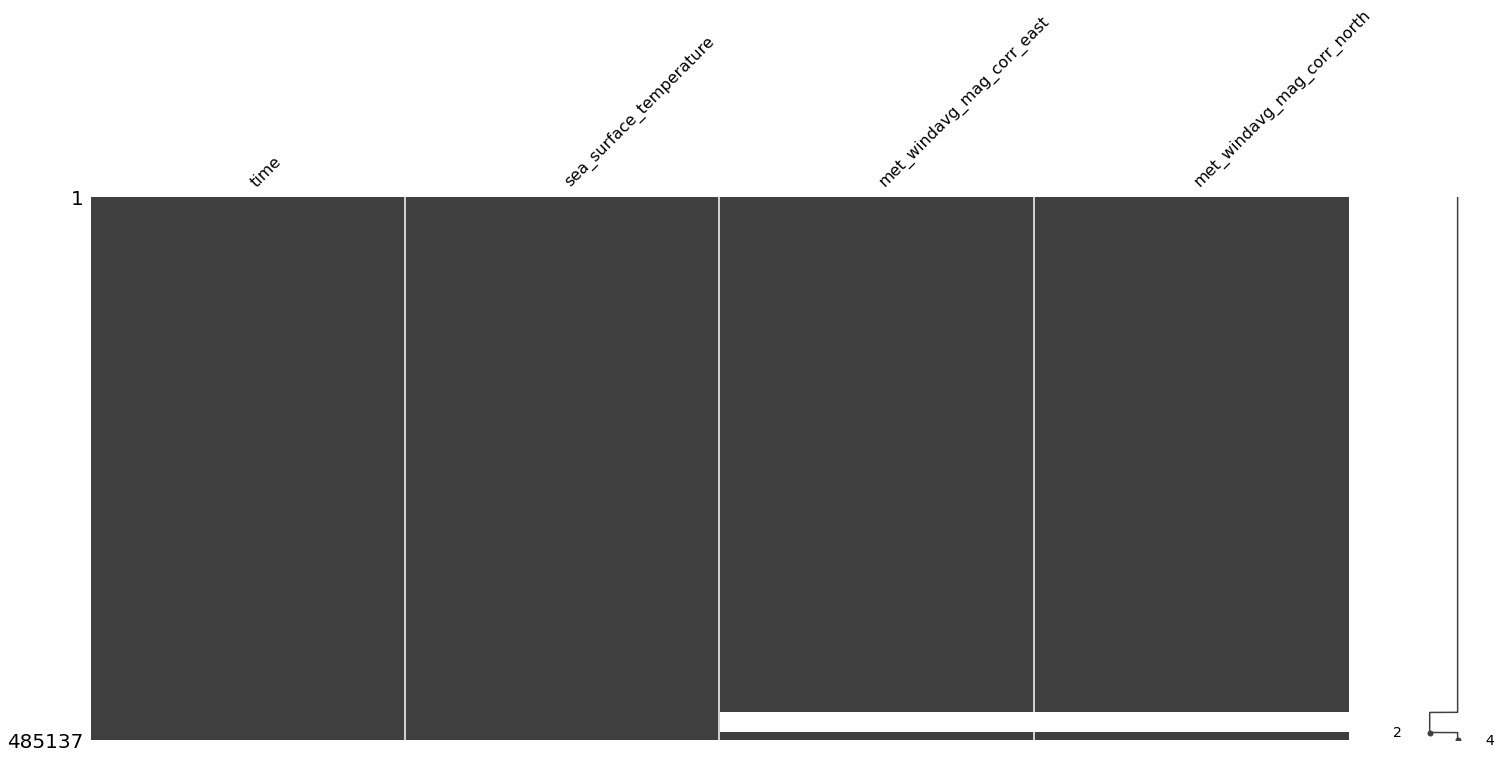

In [10]:
msno.matrix(METBK_data);

Ahh, these must be the odd values that were in the very first plot I made in the 02_data_analysis_2017 notebook! These values don't overlap with the time period covered by the 200 meter platform so we don't actually need to worry about them since we'll be dropping those observations anyway! Let's do that now, and then look for those fill values. 

First, find the last observation in 2017 collected by the 200 meter platform.

In [ ]:
def remove_zeros(df, variables):
    cnames = []
    for v in variables:
        if v not in ['lat', 'lon']:
            cname = v + '_ind'
            cnames.append(cname)
            df[cname] = df[v] > 0.00
    for cn in cnames:
        df = df.loc[df[cn] == True]
    df = df.drop(columns=cnames)
    return df

attempting to interpolate to a regular grid

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [4]:
profiler_data = pd.read_csv('../../coastal_upwelling_output/profiler_data_2018.csv')

In [5]:
profiler_data.time

0           2018-07-17 15:38:50.061576192
1           2018-07-17 15:38:51.061581824
2           2018-07-17 15:38:52.061271552
3           2018-07-17 15:38:53.061588992
4           2018-07-17 15:38:54.061177344
                        ...              
13164698    2018-12-31 11:59:55.458120192
13164699    2018-12-31 11:59:56.458231296
13164700    2018-12-31 11:59:57.458030592
13164701    2018-12-31 11:59:58.457932288
13164702    2018-12-31 11:59:59.458563072
Name: time, Length: 13164703, dtype: object

In [6]:
profiler_data['time'] = pd.to_datetime(profiler_data['time'])

In [90]:
mask = (profiler_data['time'][:] > '2018-08-20') & (profiler_data['time'] <= '2018-08-22').reset_index(drop=True)
df = profiler_data.loc[mask].reset_index(drop=True)

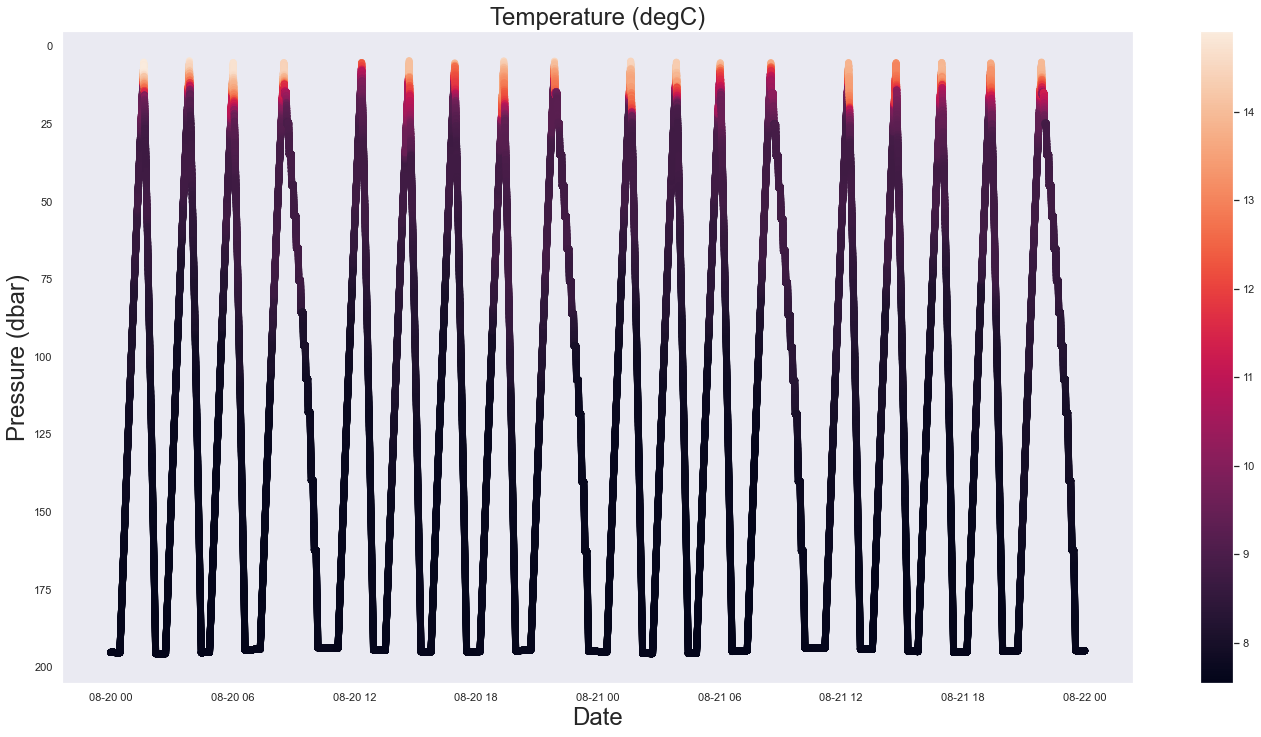

In [91]:
fig, ax = plt.subplots(figsize=(24, 12))

ax.invert_yaxis()
ax.grid()

sc = ax.scatter(df['time'],df['seawater_pressure'],c=df['seawater_temperature'])
ax.set_xlabel('Date', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('Temperature (degC)', size=24)
cb = fig.colorbar(sc,ax=ax)

In [92]:
df 

,time,seawater_pressure,density,practical_salinity,seawater_temperature,corrected_dissolved_oxygen
0,2018-08-20 00:00:00.487672832,195.266682,1027.412445,33.955529,7.588682,62.809145
1,2018-08-20 00:00:01.487677440,195.267718,1027.412452,33.955520,7.588622,62.740385
2,2018-08-20 00:00:02.487267328,195.266634,1027.412391,33.955461,7.588682,62.797698
3,2018-08-20 00:00:03.487169536,195.266650,1027.412554,33.955657,7.588622,62.809179
4,2018-08-20 00:00:04.487488000,195.270938,1027.412625,33.955723,7.588622,62.774750
...,...,...,...,...,...,...
172792,2018-08-21 23:59:55.733141504,194.758161,1027.408841,33.957381,7.607196,65.127753
172793,2018-08-21 23:59:56.733457408,194.758145,1027.408685,33.957160,7.607074,65.128050
172794,2018-08-21 23:59:57.732943360,194.760297,1027.408912,33.957414,7.606952,65.082252
172795,2018-08-21 23:59:58.733262336,194.762417,1027.408924,33.957404,7.606891,65.116785


In [288]:
mask = (profiler_data['time'][:] > '2018-12-01') & (profiler_data['time'] <= '2018-12-31').reset_index(drop=True)
df = profiler_data.loc[mask].reset_index(drop=True)
# df = df.resample('T', on='time').mean().dropna(how='all').reset_index()
df['time']

0         2018-12-01 00:00:00.177739264
1         2018-12-01 00:00:01.176911360
2         2018-12-01 00:00:02.177646080
3         2018-12-01 00:00:03.176923136
4         2018-12-01 00:00:04.177553920
                       ...             
2590838   2018-12-30 23:59:55.540899328
2590839   2018-12-30 23:59:56.540905984
2590840   2018-12-30 23:59:57.540183040
2590841   2018-12-30 23:59:58.539668992
2590842   2018-12-30 23:59:59.539779072
Name: time, Length: 2590843, dtype: datetime64[ns]

In [289]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = df.time.astype(int) / 100000000000 # np.random.random(100)
y = df.seawater_pressure # np.random.random(100)
z = df.seawater_temperature # np.random.random(100)

In [290]:
x

0          1.543622e+07
1          1.543622e+07
2          1.543622e+07
3          1.543622e+07
4          1.543622e+07
               ...     
2590838    1.546214e+07
2590839    1.546214e+07
2590840    1.546214e+07
2590841    1.546214e+07
2590842    1.546214e+07
Name: time, Length: 2590843, dtype: float64

In [291]:
( max(x) - max(y) ) / 24

644247.7377516192

In [292]:
# target grid to interpolate to
xi = np.arange(min(x), max(x), 10)
yi = np.arange(min(y), max(y), 10)
xi

array([15436224.00177739, 15436234.00177739, 15436244.00177739, ...,
       15462114.00177739, 15462124.00177739, 15462134.00177739])

In [293]:
xi,yi = np.meshgrid(xi,yi)

In [294]:
xi.shape

(20, 2592)

In [295]:
yi.shape

(20, 2592)

In [296]:
# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi_nearest = griddata((x,y),z,(xi,yi),method='nearest', rescale=True)
zi_linear = griddata((x,y),z,(xi,yi),method='linear', rescale=True)
zi_cubic = griddata((x,y),z,(xi,yi),method='cubic', rescale=True)

In [297]:
x

0          1.543622e+07
1          1.543622e+07
2          1.543622e+07
3          1.543622e+07
4          1.543622e+07
               ...     
2590838    1.546214e+07
2590839    1.546214e+07
2590840    1.546214e+07
2590841    1.546214e+07
2590842    1.546214e+07
Name: time, Length: 2590843, dtype: float64

In [298]:
y

0          194.794355
1          194.791151
2          194.793287
3          194.795438
4          194.800778
              ...    
2590838    194.101349
2590839    194.103485
2590840    194.104553
2590841    194.102417
2590842    194.101349
Name: seawater_pressure, Length: 2590843, dtype: float64

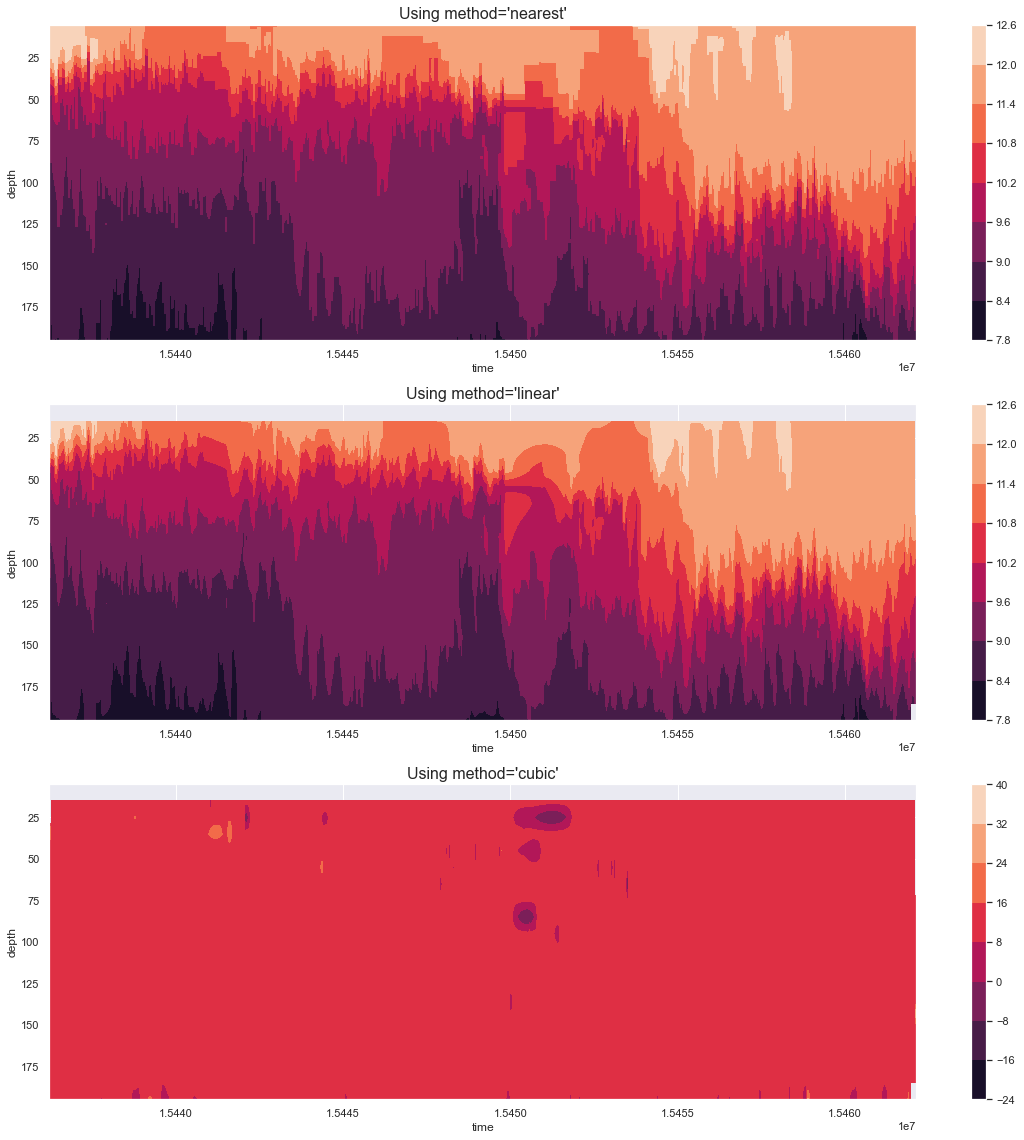

In [299]:
# mask out the field
# zi[mask] = np.nan

# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))


cs1 = ax1.contourf(xi,yi,zi_nearest)
plt.colorbar(cs1, ax=ax1)
# ax1.plot(x,y,'k.')
ax1.set_xlabel('time')
ax1.set_ylabel('depth')
ax1.invert_yaxis()
ax1.set_title("Using method='nearest'",fontsize=16)

cs2 = ax2.contourf(xi,yi,zi_linear)
plt.colorbar(cs2, ax=ax2)
# ax2.plot(x,y,'k.')
ax2.set_xlabel('time')
ax2.set_ylabel('depth')
ax2.invert_yaxis()
ax2.set_title("Using method='linear'",fontsize=16)

cs3 = ax3.contourf(xi,yi,zi_cubic)
plt.colorbar(cs3, ax=ax3)
# ax3.plot(x,y,'k.')
ax3.set_xlabel('time')
ax3.set_ylabel('depth')
ax3.invert_yaxis()
ax3.set_title("Using method='cubic'",fontsize=16)

plt.tight_layout();
plt.savefig('gridded_data.png')

In [300]:
for row in zi:
    print(row)

[ 9.59918094  9.59918094  9.59918094  9.59918094  9.59918094  9.59918094
  9.59918094  9.59918094  9.59918094  9.59918094  9.59918094  9.59918094
  9.59918094  9.59918094  9.59918094  9.59918094  9.59918094  9.59918094
  9.59918094  9.59918094  9.59918094  9.59918094  9.87743086  9.87743086
  9.87743086  9.87743086  9.87743086  9.87743086  9.87743086  9.87743086
  9.87743086  9.87743086  9.87743086  9.87743086  9.87743086  9.87743086
  9.87743086  9.87743086  9.15308909  9.15308909  9.15308909  9.15308909
  9.15308909  9.15308909  9.15308909  9.15308909  9.15308909  9.15308909
  9.15308909  9.15308909  9.15308909  9.15308909  9.15308909  9.15308909
  9.89300307  9.244432    9.244432    9.244432    9.244432   10.35329127
 10.35329127 10.35329127 10.35329127 10.35329127 10.35329127 10.35329127
 10.35329127 10.35329127 10.35329127 10.35329127 10.35329127 10.35329127
 10.35329127  9.76681035  9.76681035  9.76681035  9.76681035  9.76681035
  9.76681035  9.76681035  9.76681035  9.76681035  9

In [301]:
z_df = pd.DataFrame(zi)

In [302]:
z_df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,...,10.143887,10.143887,10.143887,10.143887,10.143887,10.143887,10.143887,10.143887,10.143887,10.143887
1,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,9.599181,...,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464
2,9.493640,9.493640,9.493640,9.493640,9.493640,9.493640,9.493640,9.493640,9.493640,9.493640,...,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464
3,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,9.493640,...,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464,8.867464
4,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,...,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778
5,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,8.528362,9.300947,9.300947,9.300947,...,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778
6,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,...,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778,8.411778
7,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,...,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225
8,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,7.851838,...,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225,8.270225
9,7.878168,7.878168,7.878168,7.878168,7.878168,7.878168,7.878168,7.878168,7.878168,7.878168,...,8.020590,8.020590,8.020590,8.020590,8.020590,8.020590,8.020590,8.020590,8.020590,8.020590
